# Regularization

## Regularization과 Normalzation의 차이점
#### Regularization : 정칙화  
과적합(Overfitting)을 해결하기 위한 방법 중의 하나  
L1, L2 Regularization, Dropout, Batch normalization 등이 있습니다.  
Regularization 기법들은 모델이 train set의 정답을 맞추지 못하도록 오버피팅을 방해(train loss가 증가) 하는 역할을 합니다.  
그래서 train loss는 약간 증가하지만 결과적으로, validation loss나 최종적인 test loss를 감소시키려는 목적을 가지고 있지요.  

#### Normalization : 정규화
데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정  
트레이닝을 할 때에 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정입니다.  

In [1]:
# Iris dataset https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# virginica종
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


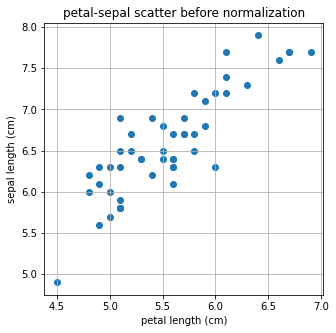

In [3]:
# 값으로만 보면 직관적이지 않으니 산점도로 그려봅니다. 
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

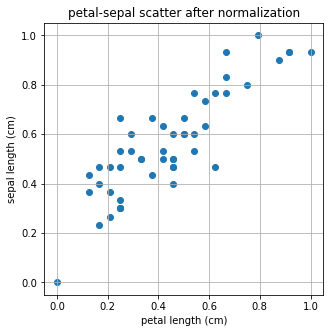

In [4]:
# x, y축을 다루기 용이한 0~1 값으로 Normlization
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### Regularization
`sklearn.linear_model`에는 L1, L2 Regression인 `Lasso`와 `Ridge` 모델도 함께 포함되어 있다.  

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


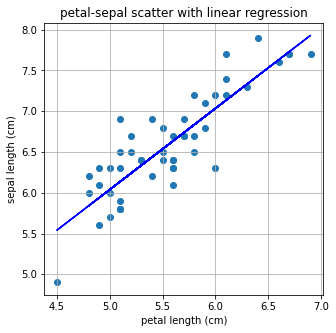

In [6]:
# 위에서 구한 기울기와 절편으로 만드는 일차함수
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

L1, L2 Regularization으로 Regression을 해보겠습니다.  
이는 Lasso, Ridge라고 부릅니다.

기울기 : 0.00, 절편 : 6.59


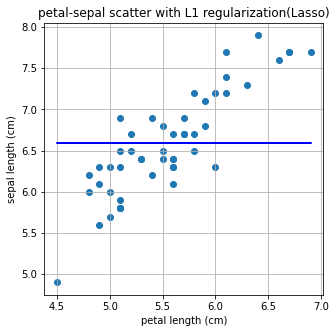

In [8]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


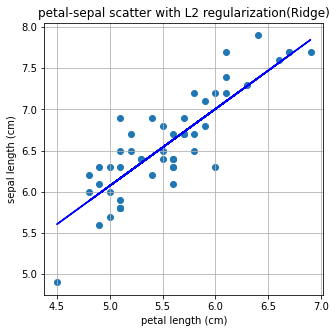

In [9]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

Lasso 방법은 제대로 문제를 풀지 못하고  
Ridge 방법은 Liner Regression과 큰 차이가 없는 결과가 나옵니다. 

## L1 Regularization Lasso
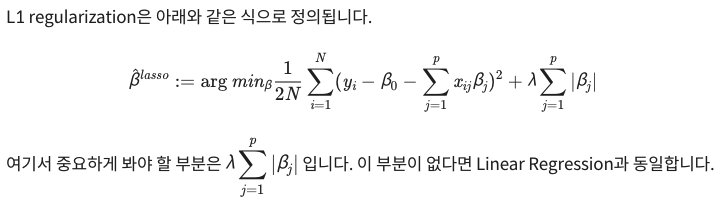



#### 왜 L1만 답이 나오지 않았을까?
우리는 X를 petal length, Y를 sepal length로 하여 N=50, p=1인 선형 회귀 방법을 풀었습니다.  
식을 간단히 정리하면 아래와 같습니다. 여기서 β0는 절편, β1은 기울기를 말하는 것입니다.
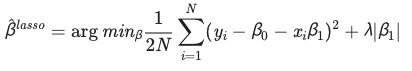

L1 Regularization을 사용할 때는 X가 2차원 이상인 여러 컬럼 값이 있는 데이터일 때 실제 효과를 볼 수 있습니다.  

컬럼 수가 많은 wine dataset을 이용해보겠습니다.  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [11]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [12]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [14]:
# Linear regression으로 문제 풀기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred)) #절대 오차
print('Mean Squared Error:', mean_squared_error(y_test, pred)) #제곱 오차
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred))) #평균 제곱값 오차

print("\n\n coefficient linear regression")
print(model.coef_) # 계수

result of linear regression
Mean Absolute Error: 0.25128973939722676
Mean Squared Error: 0.10624587409525633
Mean Root Squared Error: 0.3259537913497193


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [16]:
# L1 regularization으로 문제 풀기
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred)) #절대 오차
print('Mean Squared Error:', mean_squared_error(y_test, pred)) # 제곱 오차
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred))) # 평균 제곱값 오차

print("\n\n coefficient of Lasso")
print(L1.coef_) #계수

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.09559568945781888
Mean Root Squared Error: 0.3091855259513596


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


coefficient 부분을 보면 차이가 큰 차이가 있습니다.  
Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구하는 반면, L1 Regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있습니다.  

이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있습니다. 

다만 Linear Regression과 L1, L2 Regularization의 차이 중 하나는 α라는 하이퍼파라미터(수식에서는 λ)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점입니다.

## L2 Reularization
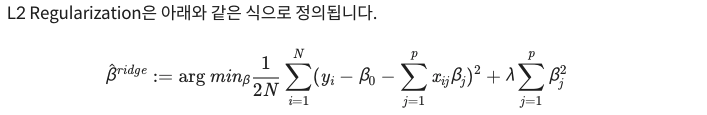

### L1 / L2 Regularization의 차이점
L1과의 차이는 수식의 마지막쪽인 
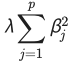
위 부분입니다.  
L1/L2 Regularization의 이름과 큰 관련이 있습니다.  

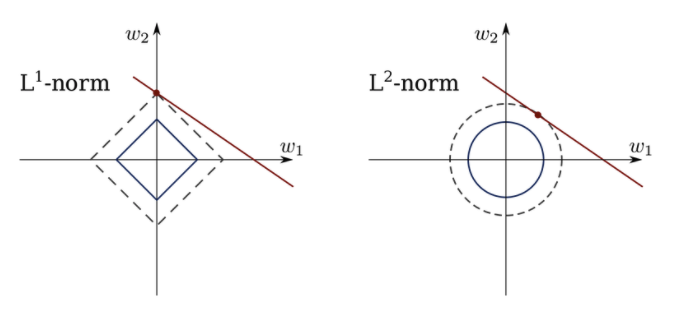

위의 등고선처럼 보이는 내용은 우리가 풀어야 하는 문제입니다.  

`L1 Regularization`은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 **차원 축소와 비슷한 역할**을 하는 것이 특징이며,  
`L2 Regularization`은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 Regularization보다는 **수렴 속도가 빠르다**는 장점이 있습니다. 

**데이터에 따라 적절한 Regularization 방법을 활용하는 것이 좋습니다.**

## Lp norm

### vector norm
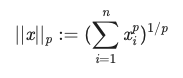

In [17]:
# p와 x의 값을 바꾸어가며 실험
x=np.array([1,10,1,1,1])
p=5
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


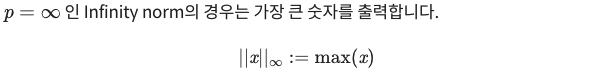

In [18]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


### matrix norm
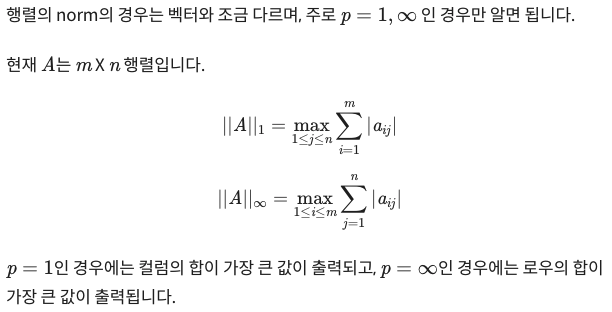

In [19]:
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


## Dropout
드롭아웃(Dropout) 기법은 Overfitting을 막는 Regularization layer 중 하나인 논문입니다.  
https://jmlr.org/papers/v15/srivastava14a.html

fully connected layer에서 Overfitting이 생기는 경우에 주로 Dropout layer를 추가합니다.  
https://keras.io/api/layers/regularization_layers/dropout/

### Not Overfitting
먼저 not overfitting 상황에서 Dropout layer를 사용해보겠습니다.

In [20]:
# fashion mnit 데이터 셋 학습
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

Init Plugin
=3
Init Graph Optimizer
Init Kernel


In [21]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

4423680/4422102 [==============================] - 1s 0us/step


In [22]:
# dropout layer를 중간에 추가하여 확률을 1에 가깝게 주면 어떻게 되는지 살펴보도록 하겠습니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 학습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

2021-08-11 11:53:11.411583: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-11 11:53:11.411694: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-08-11 11:53:11.519048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-11 11:53:11.519262: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1
Epoch 1/5
   1/1875 [..............................] - ETA: 7:08 - loss: 3.5572 - accuracy: 0.0625

2021-08-11 11:53:11.617159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 1.3985 - accuracy: 0.4516
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1967 - accuracy: 0.5189
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1482 - accuracy: 0.5356
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 1.1294 - accuracy: 0.5431
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0961 - accuracy: 0.5577


In [23]:
# Dropout이 없을 때 학습해보면, 5 epoch로도 충분히 높은 정확도
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
  36/1875 [..............................] - ETA: 8s - loss: 1.2389 - accuracy: 0.5738  

2021-08-11 11:54:00.593989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4980 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3770 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3387 - accuracy: 0.8745
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3126 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2953 - accuracy: 0.8923


일부러 중간에 Dropout layer를 추가하여 0.9의 확률 값을 주니 학습이 안 됨을 확인하였습니다.  
다음은 overfitting이 나는 환경에서의 Dropout의 중요성을 알아보도록 하겠습니다.  

### Overfitting
overfitting이 되는지 확인해보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도입니다.  
overfitting이 되게 하기 위해 의도적으로 train set을 99%로 늘리고 validation set을 줄였습니다.

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
  1/117 [..............................] - ETA: 29s - loss: 2.3026 - accuracy: 0.0723

2021-08-11 11:54:49.720453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 10ms/step - loss: 2.0546 - accuracy: 0.5087 - val_loss: 1.6506 - val_accuracy: 0.5667
Epoch 2/200
 13/117 [==>...........................] - ETA: 0s - loss: 1.6385 - accuracy: 0.5581

2021-08-11 11:54:51.082289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 9ms/step - loss: 1.4067 - accuracy: 0.6075 - val_loss: 1.1821 - val_accuracy: 0.6450
Epoch 3/200
117/117 [==============================] - 1s 8ms/step - loss: 1.0741 - accuracy: 0.6776 - val_loss: 0.9566 - val_accuracy: 0.7100
Epoch 4/200
117/117 [==============================] - 1s 9ms/step - loss: 0.8946 - accuracy: 0.7186 - val_loss: 0.8183 - val_accuracy: 0.7450
Epoch 5/200
117/117 [==============================] - 1s 9ms/step - loss: 0.7899 - accuracy: 0.7340 - val_loss: 0.7394 - val_accuracy: 0.7667
Epoch 6/200
117/117 [==============================] - 1s 10ms/step - loss: 0.7264 - accuracy: 0.7470 - val_loss: 0.6928 - val_accuracy: 0.7717
Epoch 7/200
117/117 [==============================] - 1s 10ms/step - loss: 0.6842 - accuracy: 0.7565 - val_loss: 0.6582 - val_accuracy: 0.7867
Epoch 8/200
117/117 [==============================] - 1s 8ms/step - loss: 0.6521 - accuracy: 0.7675 - val_loss: 0.6341 - val_accuracy: 0.7883
Epoch 9/2

Epoch 59/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3886 - accuracy: 0.8637 - val_loss: 0.3966 - val_accuracy: 0.8400
Epoch 60/200
117/117 [==============================] - 1s 7ms/step - loss: 0.3871 - accuracy: 0.8641 - val_loss: 0.3988 - val_accuracy: 0.8417
Epoch 61/200
117/117 [==============================] - 1s 7ms/step - loss: 0.3859 - accuracy: 0.8643 - val_loss: 0.3943 - val_accuracy: 0.8433
Epoch 62/200
117/117 [==============================] - 1s 7ms/step - loss: 0.3845 - accuracy: 0.8649 - val_loss: 0.3952 - val_accuracy: 0.8383
Epoch 63/200
117/117 [==============================] - 1s 7ms/step - loss: 0.3839 - accuracy: 0.8649 - val_loss: 0.3897 - val_accuracy: 0.8367
Epoch 64/200
117/117 [==============================] - 1s 7ms/step - loss: 0.3820 - accuracy: 0.8660 - val_loss: 0.3959 - val_accuracy: 0.8433
Epoch 65/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3808 - accuracy: 0.8657 - val_loss: 0.3876 - val_accuracy:

Epoch 116/200
117/117 [==============================] - 1s 7ms/step - loss: 0.3354 - accuracy: 0.8820 - val_loss: 0.3608 - val_accuracy: 0.8567
Epoch 117/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3349 - accuracy: 0.8820 - val_loss: 0.3573 - val_accuracy: 0.8550
Epoch 118/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3335 - accuracy: 0.8826 - val_loss: 0.3563 - val_accuracy: 0.8550
Epoch 119/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3347 - accuracy: 0.8818 - val_loss: 0.3577 - val_accuracy: 0.8617
Epoch 120/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3324 - accuracy: 0.8835 - val_loss: 0.3534 - val_accuracy: 0.8583
Epoch 121/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3317 - accuracy: 0.8829 - val_loss: 0.3615 - val_accuracy: 0.8650
Epoch 122/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3318 - accuracy: 0.8832 - val_loss: 0.3586 - val_ac

117/117 [==============================] - 1s 10ms/step - loss: 0.3006 - accuracy: 0.8932 - val_loss: 0.3334 - val_accuracy: 0.8683
Epoch 173/200
117/117 [==============================] - 1s 11ms/step - loss: 0.3011 - accuracy: 0.8932 - val_loss: 0.3362 - val_accuracy: 0.8683
Epoch 174/200
117/117 [==============================] - 1s 10ms/step - loss: 0.2999 - accuracy: 0.8926 - val_loss: 0.3369 - val_accuracy: 0.8717
Epoch 175/200
117/117 [==============================] - 1s 10ms/step - loss: 0.2994 - accuracy: 0.8932 - val_loss: 0.3385 - val_accuracy: 0.8683
Epoch 176/200
117/117 [==============================] - 1s 11ms/step - loss: 0.3007 - accuracy: 0.8933 - val_loss: 0.3356 - val_accuracy: 0.8717
Epoch 177/200
117/117 [==============================] - 1s 10ms/step - loss: 0.2997 - accuracy: 0.8930 - val_loss: 0.3384 - val_accuracy: 0.8683
Epoch 178/200
117/117 [==============================] - 1s 10ms/step - loss: 0.2983 - accuracy: 0.8937 - val_loss: 0.3344 - val_accuracy:

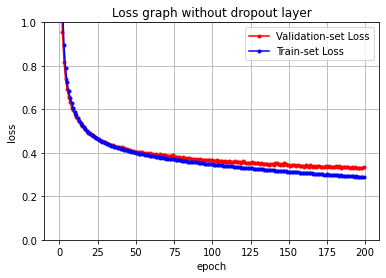

In [25]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

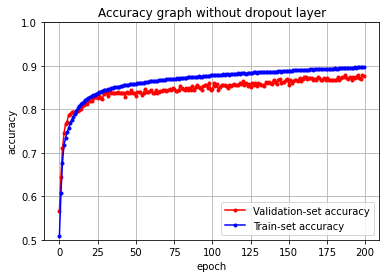

In [26]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

droupout layer가 없는 fully connected layer에서 200번 정도의 학습을 하니 trains set의 accuracy는 올라가고, loss는 점점 떨어졌습니다.  
그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있었습니다.  


이렇게 오버피팅을 만든 환경에서 Dropout layer를 추가한 뒤 나머지 환경은 같게 한 실험을 살펴보도록 하겠습니다.

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
 13/117 [==>...........................] - ETA: 0s - loss: 2.2921 - accuracy: 0.2901

2021-08-11 11:58:05.125087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 9ms/step - loss: 2.0669 - accuracy: 0.4587 - val_loss: 1.6705 - val_accuracy: 0.5950
Epoch 2/200
 14/117 [==>...........................] - ETA: 0s - loss: 1.6670 - accuracy: 0.5292

2021-08-11 11:58:06.197765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 11ms/step - loss: 1.4498 - accuracy: 0.5661 - val_loss: 1.2081 - val_accuracy: 0.6350
Epoch 3/200
117/117 [==============================] - 1s 9ms/step - loss: 1.1405 - accuracy: 0.6296 - val_loss: 0.9917 - val_accuracy: 0.7250
Epoch 4/200
117/117 [==============================] - 1s 9ms/step - loss: 0.9754 - accuracy: 0.6740 - val_loss: 0.8592 - val_accuracy: 0.7467
Epoch 5/200
117/117 [==============================] - 1s 12ms/step - loss: 0.8706 - accuracy: 0.7030 - val_loss: 0.7750 - val_accuracy: 0.7600
Epoch 6/200
117/117 [==============================] - 1s 9ms/step - loss: 0.8051 - accuracy: 0.7192 - val_loss: 0.7232 - val_accuracy: 0.7717
Epoch 7/200
117/117 [==============================] - 1s 9ms/step - loss: 0.7584 - accuracy: 0.7312 - val_loss: 0.6868 - val_accuracy: 0.7800
Epoch 8/200
117/117 [==============================] - 1s 10ms/step - loss: 0.7244 - accuracy: 0.7422 - val_loss: 0.6582 - val_accuracy: 0.7883
Epoch 9/

Epoch 59/200
117/117 [==============================] - 1s 10ms/step - loss: 0.4163 - accuracy: 0.8516 - val_loss: 0.3989 - val_accuracy: 0.8350
Epoch 60/200
117/117 [==============================] - 1s 10ms/step - loss: 0.4163 - accuracy: 0.8522 - val_loss: 0.3935 - val_accuracy: 0.8417
Epoch 61/200
117/117 [==============================] - 1s 8ms/step - loss: 0.4132 - accuracy: 0.8544 - val_loss: 0.3944 - val_accuracy: 0.8450
Epoch 62/200
117/117 [==============================] - 1s 8ms/step - loss: 0.4106 - accuracy: 0.8548 - val_loss: 0.3965 - val_accuracy: 0.8333
Epoch 63/200
117/117 [==============================] - 1s 8ms/step - loss: 0.4113 - accuracy: 0.8545 - val_loss: 0.3928 - val_accuracy: 0.8350
Epoch 64/200
117/117 [==============================] - 1s 8ms/step - loss: 0.4092 - accuracy: 0.8543 - val_loss: 0.3926 - val_accuracy: 0.8400
Epoch 65/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4076 - accuracy: 0.8548 - val_loss: 0.3926 - val_accurac

Epoch 116/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3570 - accuracy: 0.8727 - val_loss: 0.3500 - val_accuracy: 0.8583
Epoch 117/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3581 - accuracy: 0.8735 - val_loss: 0.3482 - val_accuracy: 0.8517
Epoch 118/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3565 - accuracy: 0.8739 - val_loss: 0.3490 - val_accuracy: 0.8550
Epoch 119/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3563 - accuracy: 0.8736 - val_loss: 0.3458 - val_accuracy: 0.8567
Epoch 120/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3558 - accuracy: 0.8740 - val_loss: 0.3463 - val_accuracy: 0.8533
Epoch 121/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3540 - accuracy: 0.8753 - val_loss: 0.3509 - val_accuracy: 0.8567
Epoch 122/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3545 - accuracy: 0.8733 - val_loss: 0.3438 - val_ac

117/117 [==============================] - 1s 9ms/step - loss: 0.3247 - accuracy: 0.8857 - val_loss: 0.3245 - val_accuracy: 0.8633
Epoch 173/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3249 - accuracy: 0.8843 - val_loss: 0.3265 - val_accuracy: 0.8633
Epoch 174/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3261 - accuracy: 0.8827 - val_loss: 0.3217 - val_accuracy: 0.8683
Epoch 175/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3239 - accuracy: 0.8848 - val_loss: 0.3250 - val_accuracy: 0.8700
Epoch 176/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3235 - accuracy: 0.8851 - val_loss: 0.3237 - val_accuracy: 0.8700
Epoch 177/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3238 - accuracy: 0.8852 - val_loss: 0.3235 - val_accuracy: 0.8700
Epoch 178/200
117/117 [==============================] - 1s 8ms/step - loss: 0.3213 - accuracy: 0.8858 - val_loss: 0.3219 - val_accuracy: 0.8667

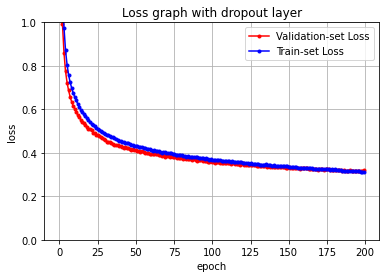

In [28]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

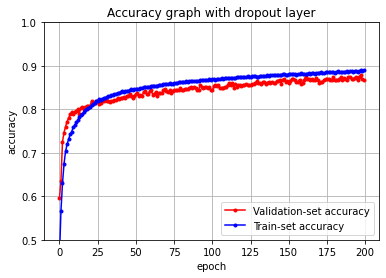

In [29]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

좋은 데이터를 가지고 오버피팅을 만드는 환경이 조금 어렵긴 했지만,  
Dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인하였습니다.  

하지만 이 또한 확률 값이 파라미터로 들어가므로, 어떠한 값을 선택하느냐는 데이터와 네트워크에 따라 달린 일입니다.

## Batch Normalization
Batch Normalization은 gradient vanishing, explode 문제를 해결하는 방법입니다.  
https://arxiv.org/pdf/1502.03167.pdf  
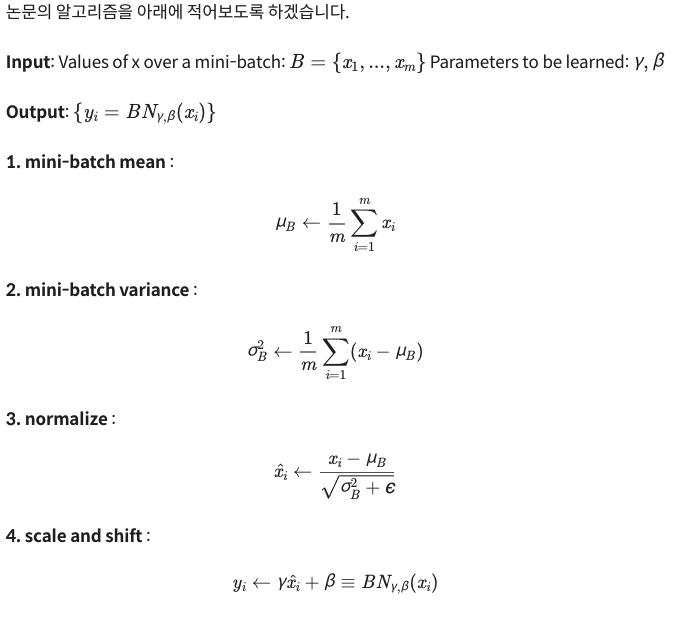

수식에서 중요한 부분은 normalize 부분에서 분모에 ϵ이 추가되었다는 점입니다.  
이 부분으로 인해 normalize 과정에서 gradient가 사라지거나(vanishing), 폭등하는(explode) 것을 막을 수 있습니다. 

아무것도 하지 않은 fully connected layer와 Batch Normalization layer를 추가한 두 실험을 비교하고자 합니다.  
중점적으로 봐야 할 내용은 **정확도 비교와 속도의 차이**입니다.

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [31]:
from sklearn.model_selection import train_test_split

# 7:3 분리
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

# Dense layer를 쌓아서 트레이닝
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
 4/21 [====>.........................] - ETA: 0s - loss: 2.0371 - accuracy: 0.2747

2021-08-11 12:04:28.203360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 24ms/step - loss: 1.2319 - accuracy: 0.5950 - val_loss: 0.7577 - val_accuracy: 0.7322
Epoch 2/20
 6/21 [=======>......................] - ETA: 0s - loss: 0.7229 - accuracy: 0.7482

2021-08-11 12:04:28.637318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 15ms/step - loss: 0.6584 - accuracy: 0.7765 - val_loss: 0.5956 - val_accuracy: 0.8046
Epoch 3/20
21/21 [==============================] - 0s 19ms/step - loss: 0.5528 - accuracy: 0.8170 - val_loss: 0.5317 - val_accuracy: 0.8233
Epoch 4/20
21/21 [==============================] - 0s 16ms/step - loss: 0.5070 - accuracy: 0.8309 - val_loss: 0.4938 - val_accuracy: 0.8341
Epoch 5/20
21/21 [==============================] - 0s 15ms/step - loss: 0.4758 - accuracy: 0.8396 - val_loss: 0.4774 - val_accuracy: 0.8366
Epoch 6/20
21/21 [==============================] - 0s 17ms/step - loss: 0.4543 - accuracy: 0.8470 - val_loss: 0.4610 - val_accuracy: 0.8420
Epoch 7/20
21/21 [==============================] - 0s 15ms/step - loss: 0.4358 - accuracy: 0.8520 - val_loss: 0.4521 - val_accuracy: 0.8435
Epoch 8/20
21/21 [==============================] - 0s 15ms/step - loss: 0.4210 - accuracy: 0.8561 - val_loss: 0.4307 - val_accuracy: 0.8526
Epoch 9/20
21/21 [======

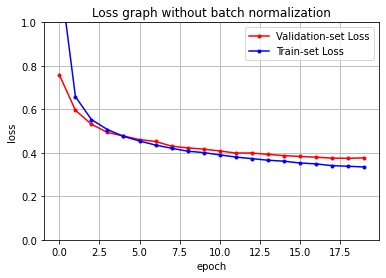

In [32]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

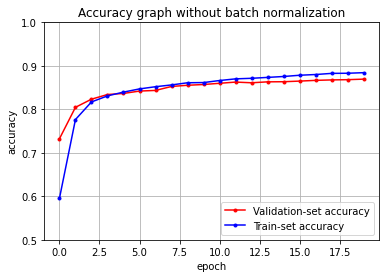

In [33]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

아래는 BatchNoramlization layer를 추가한 실습입니다.

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
 1/21 [>.............................] - ETA: 6s - loss: 3.5036 - accuracy: 0.0674

2021-08-11 12:05:07.775848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 23ms/step - loss: 1.0284 - accuracy: 0.6621 - val_loss: 1.2187 - val_accuracy: 0.5820
Epoch 2/20
 6/21 [=======>......................] - ETA: 0s - loss: 0.5719 - accuracy: 0.8007

2021-08-11 12:05:08.336265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 18ms/step - loss: 0.5338 - accuracy: 0.8167 - val_loss: 0.8601 - val_accuracy: 0.7312
Epoch 3/20
21/21 [==============================] - 0s 23ms/step - loss: 0.4631 - accuracy: 0.8412 - val_loss: 0.7630 - val_accuracy: 0.7748
Epoch 4/20
21/21 [==============================] - 0s 16ms/step - loss: 0.4236 - accuracy: 0.8551 - val_loss: 0.6835 - val_accuracy: 0.8107
Epoch 5/20
21/21 [==============================] - 0s 16ms/step - loss: 0.3950 - accuracy: 0.8627 - val_loss: 0.6342 - val_accuracy: 0.8339
Epoch 6/20
21/21 [==============================] - 0s 17ms/step - loss: 0.3739 - accuracy: 0.8704 - val_loss: 0.5855 - val_accuracy: 0.8425
Epoch 7/20
21/21 [==============================] - 0s 20ms/step - loss: 0.3578 - accuracy: 0.8757 - val_loss: 0.5477 - val_accuracy: 0.8413
Epoch 8/20
21/21 [==============================] - 0s 16ms/step - loss: 0.3411 - accuracy: 0.8805 - val_loss: 0.5176 - val_accuracy: 0.8452
Epoch 9/20
21/21 [======

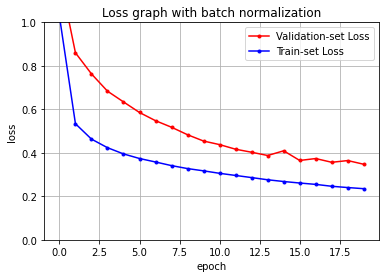

In [35]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

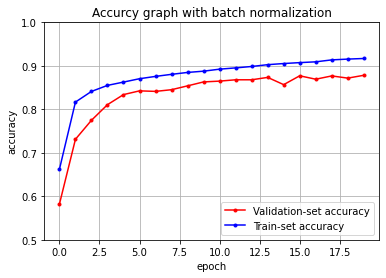

In [36]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있습니다.  
또한 loss 함수의 감소도 더 빨라짐을 확인할 수 있었습니다.  

즉 Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 갖습니다.  
그리고 ϵ부분으로 인해 안정적인 학습이 가능해집니다.